# Analysis

## Run the analysis

In [4]:
import os


for windowAfter in range(1, 7):
    for windowBefore in range(0, 3):
        print('windowBefore: ' + str(windowBefore) + ' windowAfter: ' + str(windowAfter))
        os.system(
            'cd ' + os.environ['EHR_ML_BASE'] + ';'
            +
            '''.venv/bin/python -m ehrml.predict_mortality.Evaluate ''' + os.environ['MIMIC_EHR_PIPELINE_BASE'] + '''/data/sepsis_icd_cohort/final/data_matrix.csv -tc "death_0_7_adm" -ic "person_id" "visit_occurrence_id" -mdc "measurement_date" -adc "visit_start_datetime_adm" -wb ''' + str(windowBefore) + ''' -wa ''' + str(windowAfter) + ''' -sp ''' + os.environ['MIMIC_EHR_PIPELINE_BASE'] + '''/data/sepsis_icd_cohort/experiments/01_time_window_analysis/ts_0_te_7_wb_''' + str(windowBefore) + '''_wa_''' + str(windowAfter) + '''.json;'''
            )


windowBefore: 0windowAfter: 1
2023-11-29 14:51:24,029 - EHR-ML - INFO - Parsing command line arguments
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.data_file: /home/yram0006/phd/chapter_2/workspace/MIMIC-EHR-Pipeline/data/sepsis_icd_cohort/final/data_matrix.csv
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.target_column: death_0_7_adm
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.id_columns: ['person_id', 'visit_occurrence_id']
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.measurement_date_column: measurement_date
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.anchor_date_column: visit_start_datetime_adm
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.window_before: 0
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.window_after: 1
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.save_path: /home/yram0006/phd/chapter_2/workspace/MIMIC-EHR-Pipeline/data/sepsis_icd_cohort/experiments/01_time_window_analysis/ts_0_te_7_wb_0_wa_1
2023-11-29 14:51:24,589 - EHR-ML - INFO - Split data to test 

## Read the results

In [5]:
import os
import json

import numpy as np
import pandas as pd


resultsDirPath = os.environ['MIMIC_EHR_PIPELINE_BASE'] + '/data/sepsis_icd_cohort/experiments/01_time_window_analysis'

plotDf = pd.DataFrame(np.zeros([3, 2])*np.nan)
for file in os.listdir(resultsDirPath):
    if file.endswith('.json'):
        wb = int(file.split('.')[0].split('_')[5])
        wa = int(file.split('.')[0].split('_')[7]) - 1
        with open(resultsDirPath + '/' + file) as f:
            aurocs = json.load(f)['test_roc_auc']
            mean = sum(aurocs)/len(aurocs)
            plotDf.at[wb, wa] = mean
plotDf

,0,1
0,0.607506,0.617994
1,0.642935,0.713503
2,0.642935,0.713503


## Plot

[Text(0.5, 23.52222222222222, 'Window After (days)'),
 Text(50.722222222222214, 0.5, 'Window Before (days)')]

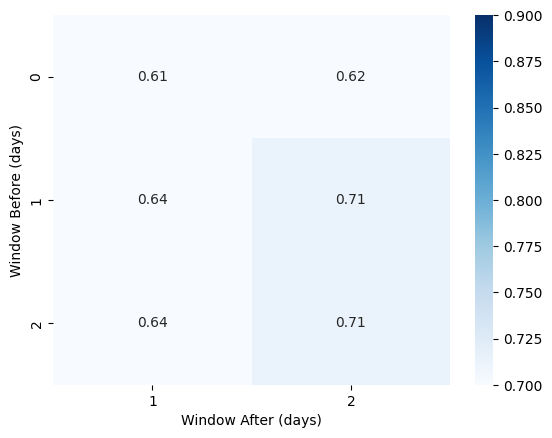

In [8]:
import seaborn as sns


s = sns.heatmap(
    plotDf,
    annot=True,
    fmt=".2f",
    cmap="Blues",
    vmin=0.7,
    vmax=0.9,
    yticklabels=['0', '1', '2'],
    xticklabels=['1', '2'],
    
)
s.set(xlabel='Window After (days)', ylabel='Window Before (days)')